<a href="https://colab.research.google.com/github/SaiTarunUppari/RIG/blob/main/Bottle_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving duck.jpg to duck.jpg
Saving duck_big.jpg to duck_big.jpg
Saving emma big.jpg to emma big.jpg
Saving emma.jpg to emma.jpg
Saving g_noise.jpg to g_noise.jpg
Saving g_noise_big.jpg to g_noise_big.jpg
Saving mario.png to mario.png
Saving mario_big.png to mario_big.png
Saving sap_noise.jpg to sap_noise.jpg
Saving sap_noise_big.jpg to sap_noise_big.jpg
Saving snake big.png to snake big.png
Saving snake.png to snake.png


**Importing the necessary libraries:**

---



In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

**Loading/Reading the image in color**

---



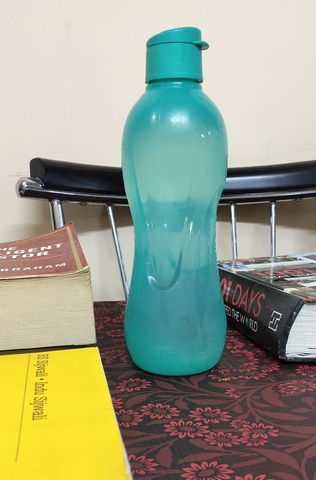

In [ ]:
image = cv2.imread("Imagesottle.jpg",cv2.IMREAD_COLOR)
cv2_imshow(image)

**Changing the ColorSpace of the image to YCrCb**

---



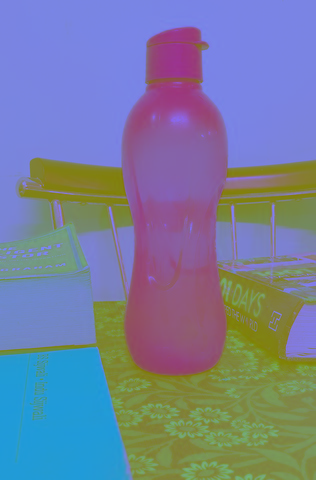

In [ ]:
# convert the color space to YCrCb
ycrcb = cv2.cvtColor(image,cv2.COLOR_BGR2YCrCb)
cv2_imshow(ycrcb)

**Setting the values for lower color and upper color**

---



In [ ]:
x1 = 0
x2 = 50
x3 = 96
x4 = 225
x5 = 102
x6 = 167

**Setting the Lower and Upper color limits**

---



In [ ]:
lower_color = np.array([x1,x2,x3],np.uint8)
upper_color = np.array([x4,x5,x6],np.uint8)

**Getting all the pixels that are "in between" the lower and upper color values**

---



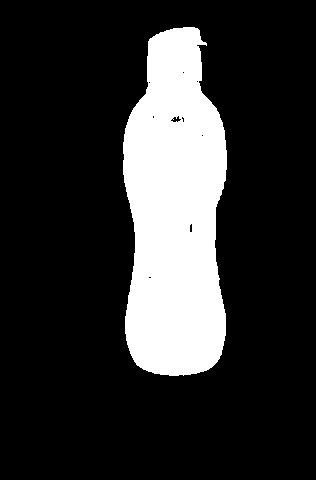

In [ ]:
bottle_rough = cv2.inRange(ycrcb,lower_color,upper_color)
cv2_imshow(bottle_rough)

**finding all the contours in the above image**

---



In [ ]:
contours, hierarchy = cv2.findContours(bottle_rough,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
len(contours)

10

**Getting the Contour of the bottle region**

---



In [ ]:
bottle_contour = max(contours,key=cv2.contourArea)

**Drawing the contour around the bottle**

---



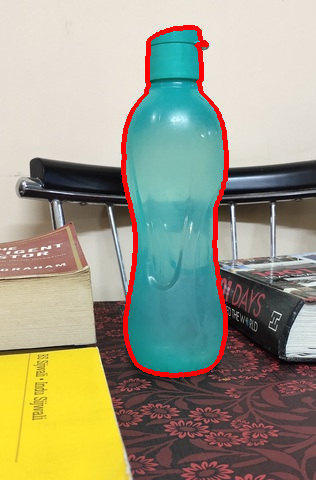

In [ ]:
image_copy = image.copy()
cv2.drawContours(image_copy,[bottle_contour],0,(0,0,255),3)
cv2_imshow(image_copy)

**Creating a black mask**

---



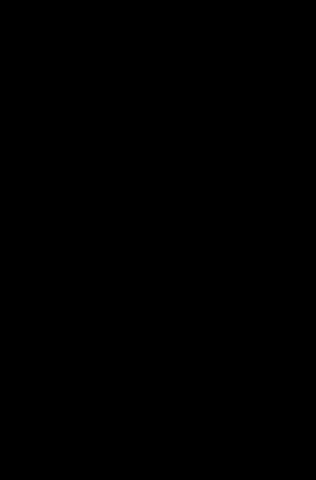

In [ ]:
# creating a black mask
mask = np.zeros(image.shape,dtype=image.dtype)
cv2_imshow(mask)

**Changing the area under the bottle in the black-mask to white color**

---



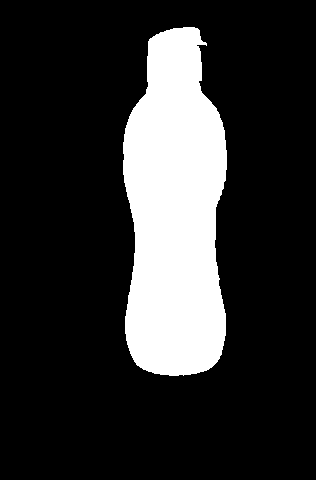

In [ ]:
# chaging the bottle region to white
cv2.drawContours(mask,[bottle_contour],0,(255,255,255),-1)
cv2_imshow(mask)

**Appying element-wise bitwise-and operation between the original image and the mask**

---



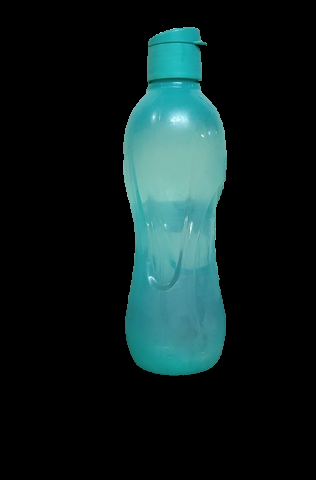

In [ ]:
# masking the original photo with a black mask
bottle = cv2.bitwise_and(image,mask)
cv2_imshow(bottle)

**Saving the image locally**

---



In [ ]:
# saving the photo locally
cv2.imwrite("bottle separated.jpg",bottle)

True